In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("datos_finales_no_outliers.csv")

In [6]:
#El xgboost no admite el simbolo menos asi que hare rename a las columnas de particulas
df = df.rename(columns={'Partículas<2.5': 'Particulas_2_5',
                       'Partículas<10': 'Particulas_10'})

In [7]:
target = "Ozono"

In [8]:
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [9]:
modelo_rf = RandomForestRegressor(max_depth=5, n_estimators=20)

In [10]:
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20)

In [11]:
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"mse: {mse_rf:.2f}")
print(f"r2 score: {r2_rf:.2f}")


Random Forest Regressor:
mse: 1273.51
r2 score: 0.06


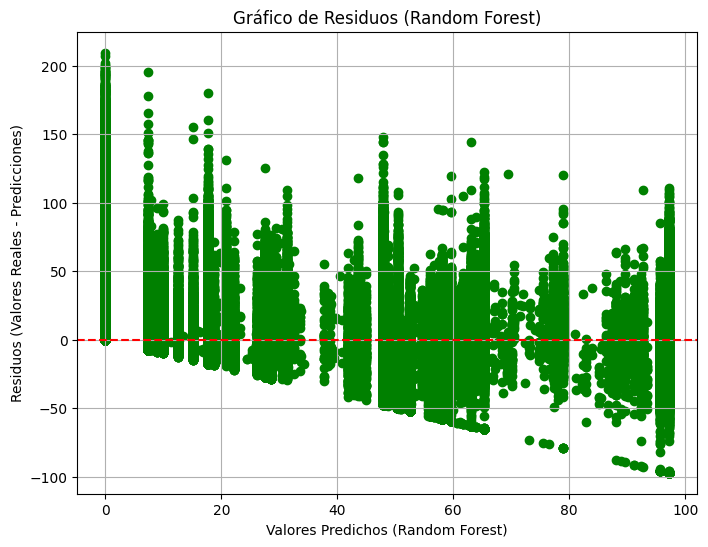

In [13]:
plt.figure(figsize=(8, 6))
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos (Random Forest)')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (Random Forest)')
plt.grid(True)
plt.show()

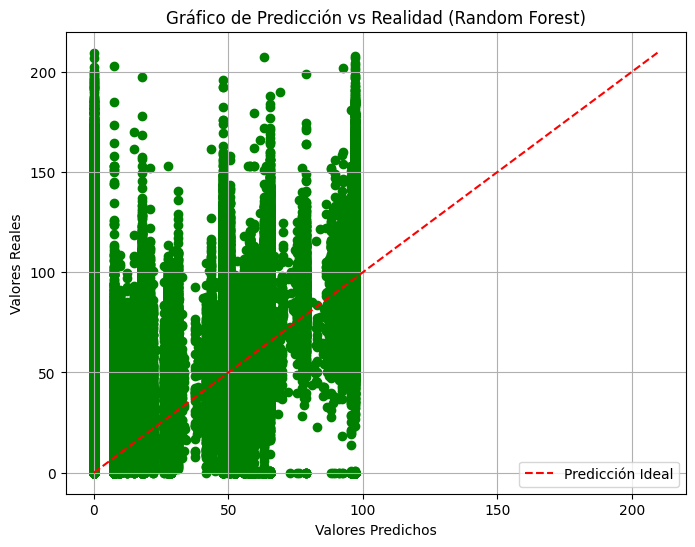

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
df.columns

Index(['Estación', 'Año', 'Mes', 'Dia', 'Hora', 'Dióxido de Azufre',
       'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno',
       'Particulas_2_5', 'Particulas_10', 'Óxidos de Nitrógeno', 'Ozono',
       'Tolueno', 'Benceno', 'Etilbenceno', 'HidrocarburosTot', 'Metano',
       'HidrocarburosNoMet', 'Temperatura', 'PuntoRocio', 'TempHumeda',
       'HumedadRelativa', 'Precipitacion', 'Presion', 'VelViento', 'DirViento',
       'Intensidad'],
      dtype='object')

In [16]:
modelo_xgb = XGBRegressor(max_depth=5, n_estimators=20)
modelo_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
y_pred_xgb = modelo_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXgboost:")
print(f"mse: {mse_xgb:.2f}")
print(f"r2 score: {r2_xgb:.2f}")


Xgboost:
mse: 1200.14
r2 score: 0.12


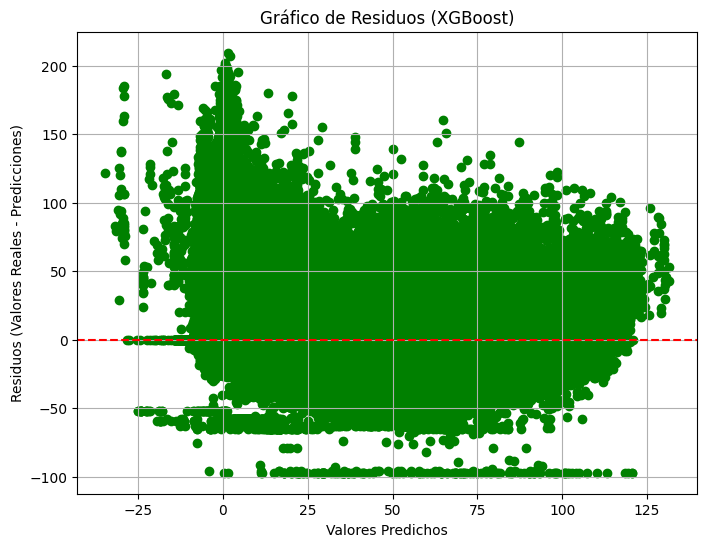

In [18]:
plt.figure(figsize=(8, 6))
residuals_xgb = y_test - y_pred_rf
plt.scatter(y_pred_xgb, residuals_xgb, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (XGBoost)')
plt.grid(True)
plt.show()

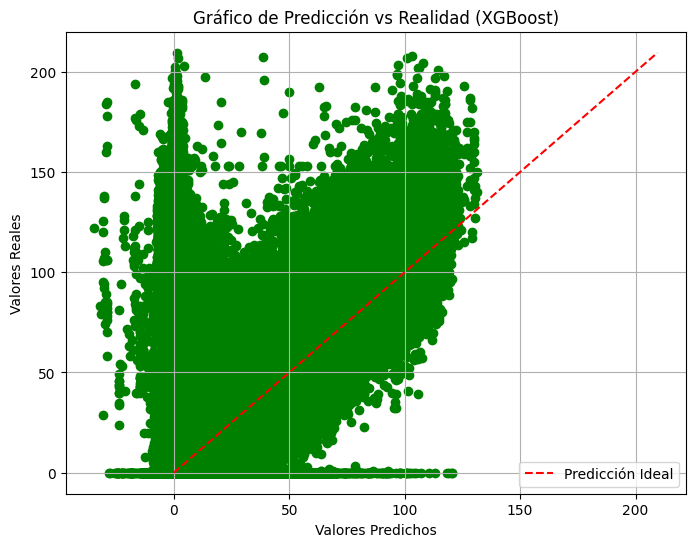

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (XGBoost)')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
df2 = pd.read_csv("datos_nuevas_variables.csv")

In [40]:
#El xgboost no admite el simbolo menos asi que hare rename a las columnas de particulas
df2 = df2.rename(columns={'Partículas<2.5': 'Particulas_2_5',
                       'Partículas<10': 'Particulas_10'})

In [41]:
target = "Ozono"

In [42]:
X = df2.drop(columns=target)
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [43]:
modelo_rf = RandomForestRegressor(max_depth=5, n_estimators=20)

In [44]:
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20)

In [45]:
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"mse: {mse_rf:.2f}")
print(f"r2 score: {r2_rf:.2f}")


Random Forest Regressor:
mse: 245.47
r2 score: 0.82


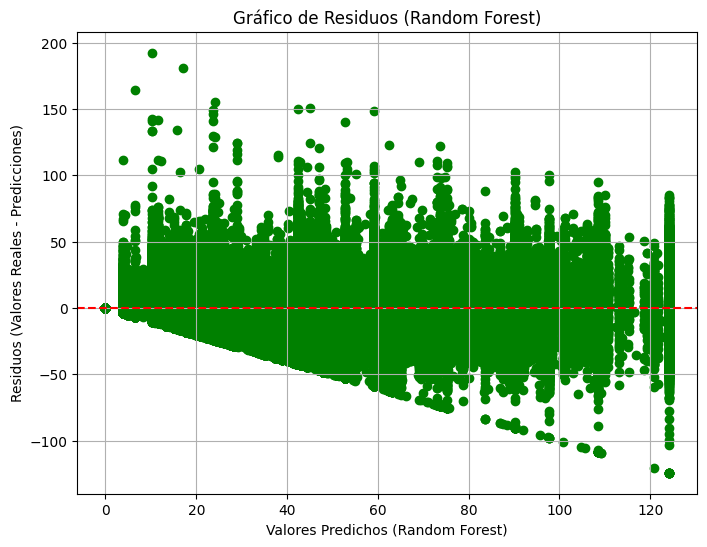

In [46]:
plt.figure(figsize=(8, 6))
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos (Random Forest)')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (Random Forest)')
plt.grid(True)
plt.show()

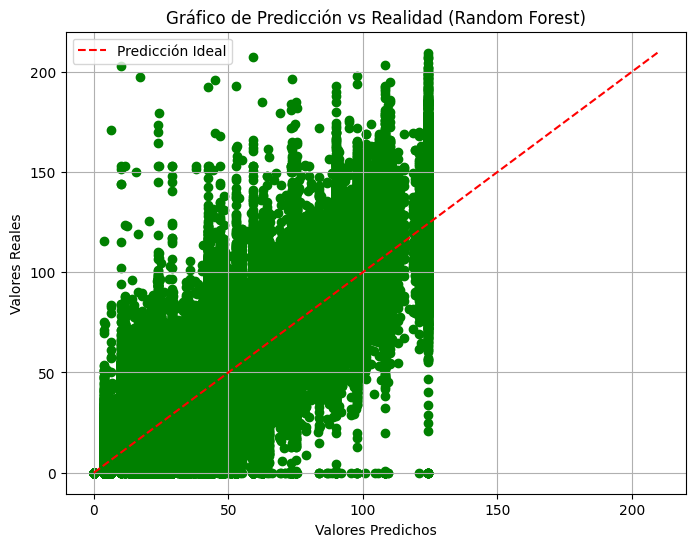

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
df.columns

Index(['Estación', 'Año', 'Mes', 'Dia', 'Hora', 'Dióxido de Azufre',
       'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno',
       'Particulas_2_5', 'Particulas_10', 'Óxidos de Nitrógeno', 'Ozono',
       'Tolueno', 'Benceno', 'Etilbenceno', 'HidrocarburosTot', 'Metano',
       'HidrocarburosNoMet', 'Temperatura', 'PuntoRocio', 'TempHumeda',
       'HumedadRelativa', 'Precipitacion', 'Presion', 'VelViento', 'DirViento',
       'Intensidad'],
      dtype='object')

In [49]:
modelo_xgb = XGBRegressor(max_depth=5, n_estimators=20)
modelo_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred_xgb = modelo_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXgboost:")
print(f"mse: {mse_xgb:.2f}")
print(f"r2 score: {r2_xgb:.2f}")


Xgboost:
mse: 141.94
r2 score: 0.90


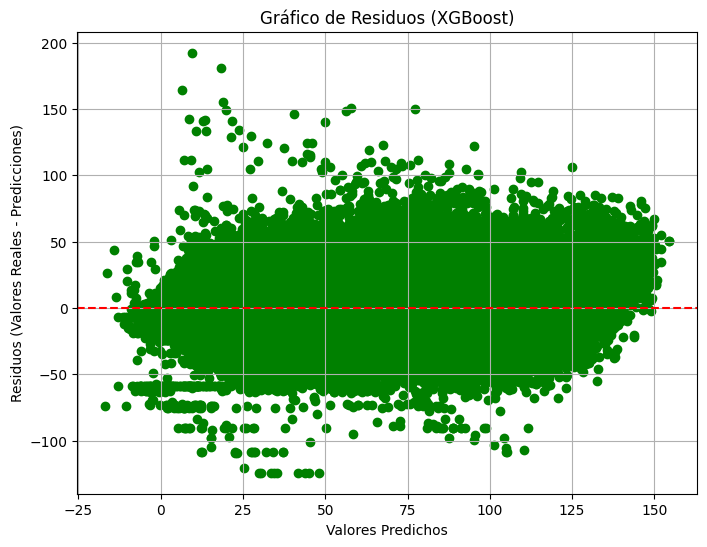

In [51]:
plt.figure(figsize=(8, 6))
residuals_xgb = y_test - y_pred_rf
plt.scatter(y_pred_xgb, residuals_xgb, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (XGBoost)')
plt.grid(True)
plt.show()

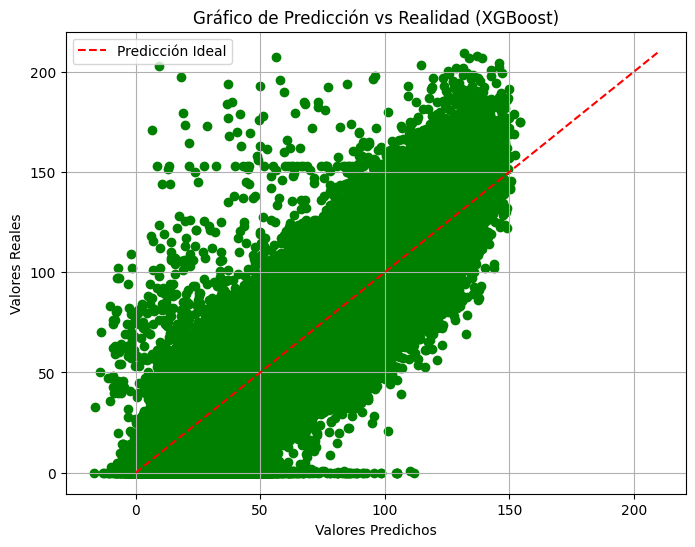

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (XGBoost)')
plt.grid(True)
plt.legend()
plt.show()